In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
d = pd.read_csv("StudentsPerformance.csv")

In [4]:
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Gender wise participants

In [5]:
d['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

There are 518 female participants and 482 male participants in the list

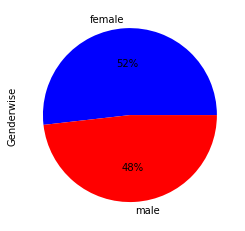

In [11]:
d['gender'].value_counts().plot.pie(label=('Genderwise'),colormap='bwr', autopct='%1.0f%%') 
plt.show()

# Analysis of parental level education

In [12]:
d['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0, 0.5, 'Count')

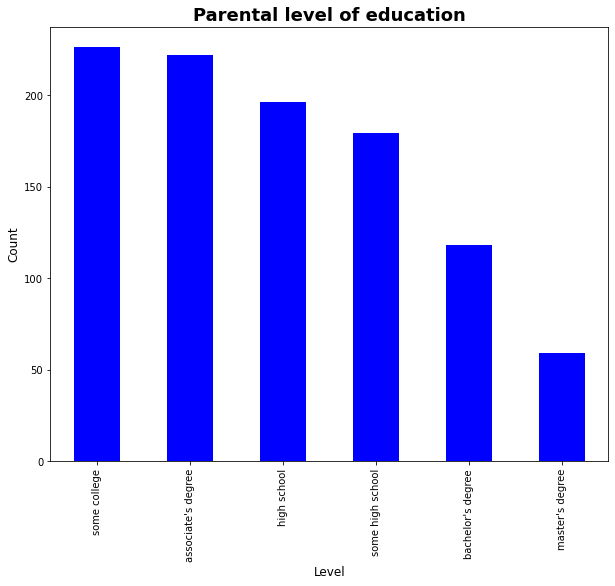

In [13]:
plt.figure(figsize=(10,8))
d['parental level of education'].value_counts().plot(kind='bar', color= 'blue')
plt.title('Parental level of education',fontsize=18,fontweight='bold')
plt.xlabel('Level',fontsize=12)
plt.ylabel('Count',fontsize=12)

From the graph we can see that majority of parents from same college

# Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

# genderwise average scores for reading and writing

In [25]:
gender = d.groupby('gender')['math score','reading score','writing score'].mean()
gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


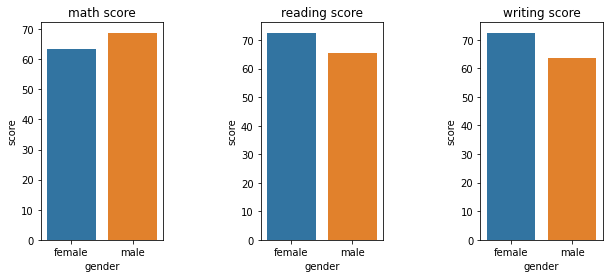

In [20]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1) 
    gender_d = d.groupby("gender")[list(d.columns[-3:])[idx]].describe()
    sns.barplot(gender_d.index, gender_d.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(d.columns[-3:])[idx])

# test preparation course

In [24]:
avg_scores = d.groupby('test preparation course')['math score','reading score','writing score'].mean()
avg_scores

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


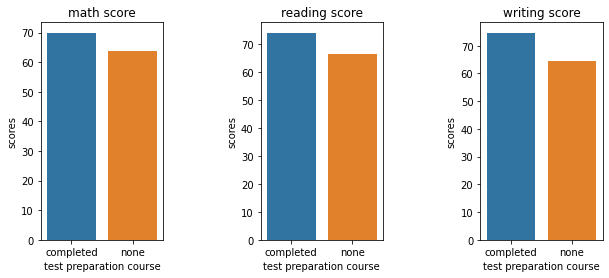

In [26]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_d = d.groupby("test preparation course")[list(d.columns[-3:])[idx]].describe()
    sns.barplot(gender_d.index, gender_d.loc[:,"mean"].values)
    plt.ylabel("scores")
    plt.title(list(d.columns[-3:])[idx])

Conclusion:
Based on Test preparation course, those who completed the course scored more in math, reading and writing while those who do not completed the course scored less in math, reading and writing.

# What do you think about the scoring variation for math, reading and writing
based on
● Gender

In [27]:
math_score_gender = d.groupby('gender')['math score'].describe()
math_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


on the basis of math,  25%, 50%, 75% scores we can clearly seen that mens performance is better

In [28]:
reading_score_gender = d.groupby('gender')['reading score'].describe()
reading_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


on the basis of reading females performance is better than males

In [29]:
writing_score_gender = d.groupby('gender')['writing score'].describe()
writing_score_gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


on the basis of writing females performance is better than males

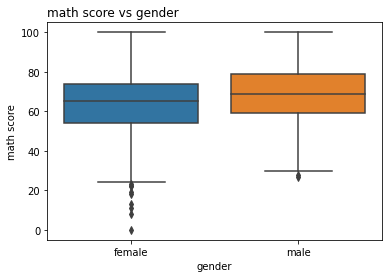

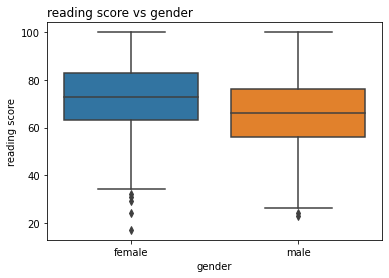

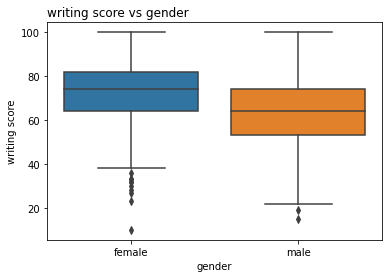

In [31]:
for item in d.columns[-3:]:
    sns.boxplot(x=d["gender"], y=d[item])
    plt.title(item+" vs gender", loc="left")
    plt.show()

Based on the gender score variation for math, reading and writing using boxplot you can clearly say that outliers present in the each 3 features

# Test preparation course

In [32]:
math_score_test = d.groupby('test preparation course')['math score'].describe()
math_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0


On scoring variation we can seen that those who has completed the course have more marks than those who are not attending the course

In [33]:
reading_score_test = d.groupby('test preparation course')['reading score'].describe()
reading_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0


On reading we can seen that those who has completed the course have more marks than those who are not attending the course

In [35]:
writing_score_test = d.groupby('test preparation course')['writing score'].describe()
writing_score_test

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0


On writing we can seen that those who has completed the course have more marks than those who are not attending the course

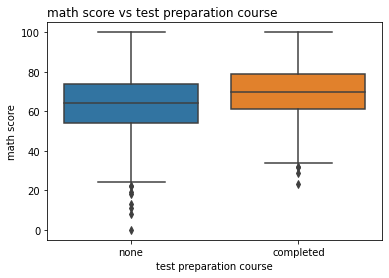

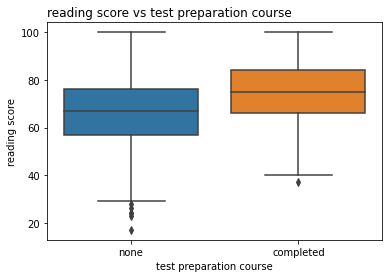

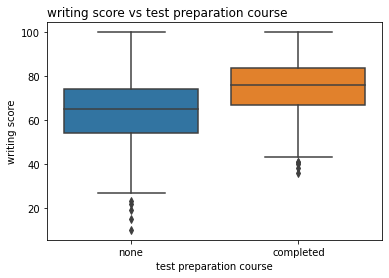

In [37]:
for item in d.columns[-3:]:
    sns.boxplot(x=d["test preparation course"], y=d[item])
    plt.title(item+" vs test preparation course", loc="left")
    plt.show()

Based on the test preparation course, score variation for math, reading and writing using boxplot you can clearly say that outliers present in the each 3 features

# The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [38]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.001,15.569567,0.0,57.0,66.0,77.00,100.0
reading score,1000.0,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,68.119,15.226381,10.0,58.0,69.0,79.00,100.0


The top 25% of students based on their maths score is 77

In [41]:
top25_students = d[(d['math score'] >= 77.00)]
top25_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [48]:
top25_students['gender'].count()

255

There are 255 students eligible for scholorship. They scored more than 75% mark